<a href="https://colab.research.google.com/github/mitresthen/phys117_2021/blob/main/SphaleronsVBlackHolesDataPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sphalerons Black holes

##Imports, mapping, dataset

###Imports

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import math
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
import matplotlib.ticker as ticker
import statistics

#!pip install -Uqq fastbook
#import fastbook
#fastbook.setup_book()
#
#print(fastbook.__version__)
#
#from fastai.vision.all import *
#from fastai.vision import *
#from fastbook import *

#import h5py
import pandas as pd
import seaborn as sn
from PIL import Image
#from sklearn.metrics import confusion_matrix

#matplotlib.rc('image', cmap='YlGnBu')



###Mapping

In [4]:
colmapper = {
    "typ" : 0,
    "eta" : 1,
    "phi" : 2,
    "pt" : 3,
    "jmass" : 4,
    "ntrk" : 5,
    "btag" : 6,
    "hadem" : 7,
}

objectMapping = {
    0 : "Photon",
    1 : "Electron",
    2 : "Muon",
    3 : "Tau",
    4 : "Jet",
    6 : "MTE"
}

objectMappingReverse = {
    "Photon" : 0,
    "Electron" : 1,
    "Muon" : 2,
    "Tau" : 3,
    "Jet" : 4,
    "MTE" : 6
}

inclusiveObjectMapping = {
    0 : "Photon",
    1 : "Electron",
    2 : "Muon",
    3 : "Tau",
    4 : "Jet",
    6 : "MTE",
    7 : "Total"
}

inclusiveObjectMappingReverse = {
    "Photon" : 0, 
    "Electron" : 1, 
    "Muon" : 2, 
    "Tau" : 3, 
    "Jet" : 4, 
    "MTE" : 6, 
    "Total" : 7
}

###Datasets

In [5]:
class DataSet:                              #Filters and counts number of objects rejected.
  data = []
  def __init__(self,path):
    self.path = path
    self.data = self.__readData()
    self.fileName = Path(self.path).stem
    self.eventType = self.__eventType()
  def __readData(self):
      matrices = []
      countUnder15 = 0
      countUnder20 = 0
      with open(self.path, 'r') as file:
        matrix = []
        for line in file:
          elements = line.split()
          if elements[0] == "#":
            continue
          if elements[0] == "0":
            if len(matrix) != 0:
              matrices.append(matrix)
              matrix = []
            continue
          vector = []
          objType = int(elements[1])
          vector.append(objType)
          for i in range (2, 10):
            elem = float(elements[i])
            vector.append(elem)
          if vector[0] == 0 or vector[0] == 1 or vector[0] == 2:
            if vector[3] > 15:
              matrix.append(vector)
            elif vector[3] <= 15:
              countUnder15 += 1    #count for objects rejected of type photon, electron, muon.
              vector = []
          elif vector[0] == 3 or vector[0] == 4:  
            if vector[3] > 20:
              matrix.append(vector)
            elif vector[3] <= 20:
              countUnder20 += 1   #count for objects rejected of type Tau, Jet.
          else:
            matrix.append(vector)
            continue
        if len(matrix) != 0: #Add the last object of the event
          matrices.append(matrix)
      print(f'{Path(self.path).stem} count of rejected Photon, Electron, Muon: {countUnder15}')   
      print(f'{Path(self.path).stem} count of rejected Tau, Jet: {countUnder20}')   
      return matrices

  def __eventType(self):
    fileName = self.fileName
    letters = fileName[:2]
    BH = letters == "Bl" or letters == "BH"
    SP = letters == "PP"
    TT = letters == "tt"
    if BH:
      eventType = "blackHole"
    if SP:
      eventType = "sphaleron"
    if TT:
      eventType = "tt_"
    
    return eventType

In [6]:
prefix = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/"

BlackMaxOutputPath = prefix + "BlackMaxOutputFirstRun/BlackMaxOutputFirstRun.lhco"
BlackMaxOutput2Path = prefix + "BlackMaxOutputFirstRun/BlackMaxOutputFirstRun2.lhco"
Sph13Path = prefix + "spharelon_events_for_ML/PP13-Sphaleron-THR9-FRZ15-NB33-71-NSUBP5.lhco"
BH_n4_M10 = prefix + "BH/BH_n4_M10.lhco"
BH_n4_M11 = prefix + "BH/BH_n4_M11.lhco"
BH_n4_M12 = prefix + "BH/BH_n4_M12.lhco"
BH_n4_M8 = prefix + "BH/BH_n4_M8.lhco"
BH_n4_M9 = prefix + "BH/BH_n4_M9.lhco"
BH_n5_M10 = prefix + "BH/BH_n5_M10.lhco"
BH_n5_M11 = prefix + "BH/BH_n5_M11.lhco"
BH_n5_M12 = prefix + "BH/BH_n5_M12.lhco"
BH_n5_M8 = prefix + "BH/BH_n5_M8.lhco"
BH_n5_M9 = prefix + "BH/BH_n5_M9.lhco"
BH_n6_M10 = prefix + "BH/BH_n6_M10.lhco"
BH_n6_M11 = prefix + "BH/BH_n6_M11.lhco"
BH_n6_M12 = prefix + "BH/BH_n6_M12.lhco"
BH_n6_M8 = prefix + "BH/BH_n6_M8.lhco"
BH_n6_M9 = prefix + "BH/BH_n6_M9.lhco"

PP13_Sphaleron_NSUBP50 = prefix + "sphaleron/PP13-Sphaleron-THR9-FRZ15-NB33-60-NSUBP50.lhco"
PP13_Sphaleron_NSUBPALL = prefix + "sphaleron/PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL.lhco"
ttbar = prefix + "ttbar/ttbar.lhco"
ttbar_largejets = prefix + "ttbar/ttbar_largejets.lhco"




paths = [
  #BlackMaxOutputPath,
  #BlackMaxOutput2Path,
  #Sph13Path,
  #BH_n4_M10,
  #BH_n4_M11,
  #BH_n4_M12,
  BH_n4_M8,
  #BH_n4_M9,
  BH_n5_M10,
  #BH_n5_M11,
  BH_n5_M12,
  #BH_n5_M8,
  #BH_n5_M9,
  BH_n6_M10,
  #BH_n6_M11,
  #BH_n6_M12,
  BH_n6_M8,
  #BH_n6_M9,
  ##PP13_Sphaleron_NSUBP50,
  PP13_Sphaleron_NSUBPALL,
  ttbar,
  ttbar_largejets,
  ]
dataSets = []

for path in paths:
  dataset = DataSet(path)
  dataSets.append(dataset)
  print(f"Number of events in {dataset.fileName}: {len(dataset.data)}")
print(dataSets)


BH_n4_M8 count of rejected Photon, Electron, Muon: 60
BH_n4_M8 count of rejected Tau, Jet: 0
Number of events in BH_n4_M8: 9998
BH_n5_M10 count of rejected Photon, Electron, Muon: 80
BH_n5_M10 count of rejected Tau, Jet: 0
Number of events in BH_n5_M10: 9989
BH_n5_M12 count of rejected Photon, Electron, Muon: 79
BH_n5_M12 count of rejected Tau, Jet: 0
Number of events in BH_n5_M12: 9657
BH_n6_M10 count of rejected Photon, Electron, Muon: 75
BH_n6_M10 count of rejected Tau, Jet: 0
Number of events in BH_n6_M10: 9987
BH_n6_M8 count of rejected Photon, Electron, Muon: 67
BH_n6_M8 count of rejected Tau, Jet: 0
Number of events in BH_n6_M8: 9998
PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL count of rejected Photon, Electron, Muon: 98
PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL count of rejected Tau, Jet: 0
Number of events in PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL: 10000
ttbar count of rejected Photon, Electron, Muon: 1938
ttbar count of rejected Tau, Jet: 0
Number of events in ttbar: 100000
ttbar_lar

## Plotting...

In [7]:
def getObjectCounts(matrix):
  maxObjects = 0
  for matrice in matrix:
    if(len(matrice) > maxObjects):
      maxObjects = len(matrice)
  counts = [0] * (maxObjects+1)
  for matrice in matrix:
      counts[len(matrice)] += 1
  return counts

In [8]:
def getSpecificObjectCounts(matrix, objectType):
  maxObjects = 0
  for event in matrix:
    sumOfThisObject = 0
    for obj in event:
      if obj[0] == int(objectType):
        sumOfThisObject += 1
    if sumOfThisObject > maxObjects:
      maxObjects = sumOfThisObject
  #print(f'Found event with max {maxObjects} of type {objectMapping[objectType]}')
  counts = [0] * (maxObjects+1)
  for event in matrix:
    sumOfThisObject = 0
    for obj in event:
      if obj[0] == int(objectType):
        sumOfThisObject += 1
    counts[sumOfThisObject] += 1
  return counts

In [9]:
def normalizeObjectCounts(objectCounts):
  nrOfObjects = sum(objectCounts)
  return [i/nrOfObjects for i in objectCounts]

def normalizeObjectCounts2d(objectCounts2d):
  normalizedObjectCounts2d = []
  for objectCounts in objectCounts2d:
    normalizedObjectCounts = normalizeObjectCounts(objectCounts)
    normalizedObjectCounts2d.append(normalizedObjectCounts)
  return normalizedObjectCounts2d
    
def normalizeObjectCountsCutPlot(objectCountsCut, objectCounts):
  nrOfObjects = sum(objectCounts)
  return [i/nrOfObjects for i in objectCountsCut]

In [10]:
def getSpecificObjectEnergy(matrices,objectType):
  pTListSpecific = []
  for matrix in matrices:
    for obj in matrix:
      if obj[0] == int(objectType):
        pTListSpecific.append(float(obj[3]))
  return pTListSpecific 

def sumPT(matrices):
  pTListTotal = []
  for matrix in matrices:
    pT = 0
    for obj in matrix:
      pT += float(obj[3])
    pTListTotal.append(pT) 
  return pTListTotal

def sumPTCustom(matrices, objectTypes):
    """ sumPTCustom(matrices, objectTypes),  sum function for PT for specified objectTypes
        objectTypes: List of objectTypes to be used.
        Returns: List of total PT of each event, counting only for specified objectTypes. Gives 0 values for events without PT"""
    pTListTotal = []
    for matrix in matrices:
      pTList = 0
      for obj in matrix:
        if obj[0] in objectTypes:
          pTList += obj[3]
      pTListTotal.append(pTList)
    return pTListTotal

In [11]:
def absoluteMomentum(pt, eta):
  theta = 2. * np.arctan(np.exp(-eta))
  absMomentum = pt / np.sin(theta)
  return absMomentum

def energyObject(pt, eta, mass=0.):
  theta = 2. * np.arctan(np.exp(-eta))
  absMomentum = pt / np.sin(theta)
  energy = (absMomentum**2 + mass*2)**0.5
  return energy


Plot av MTE til total PT ratio:
For hver event:
1. finn total pt inkludert mte sin pt
2. finn mte for event
3. finn ratio = mte/totalPt og lagre slik at vi vet hvilken ratio som hører til hvilken event.
4. lag histogram

##Plots

###ObjectDistributions

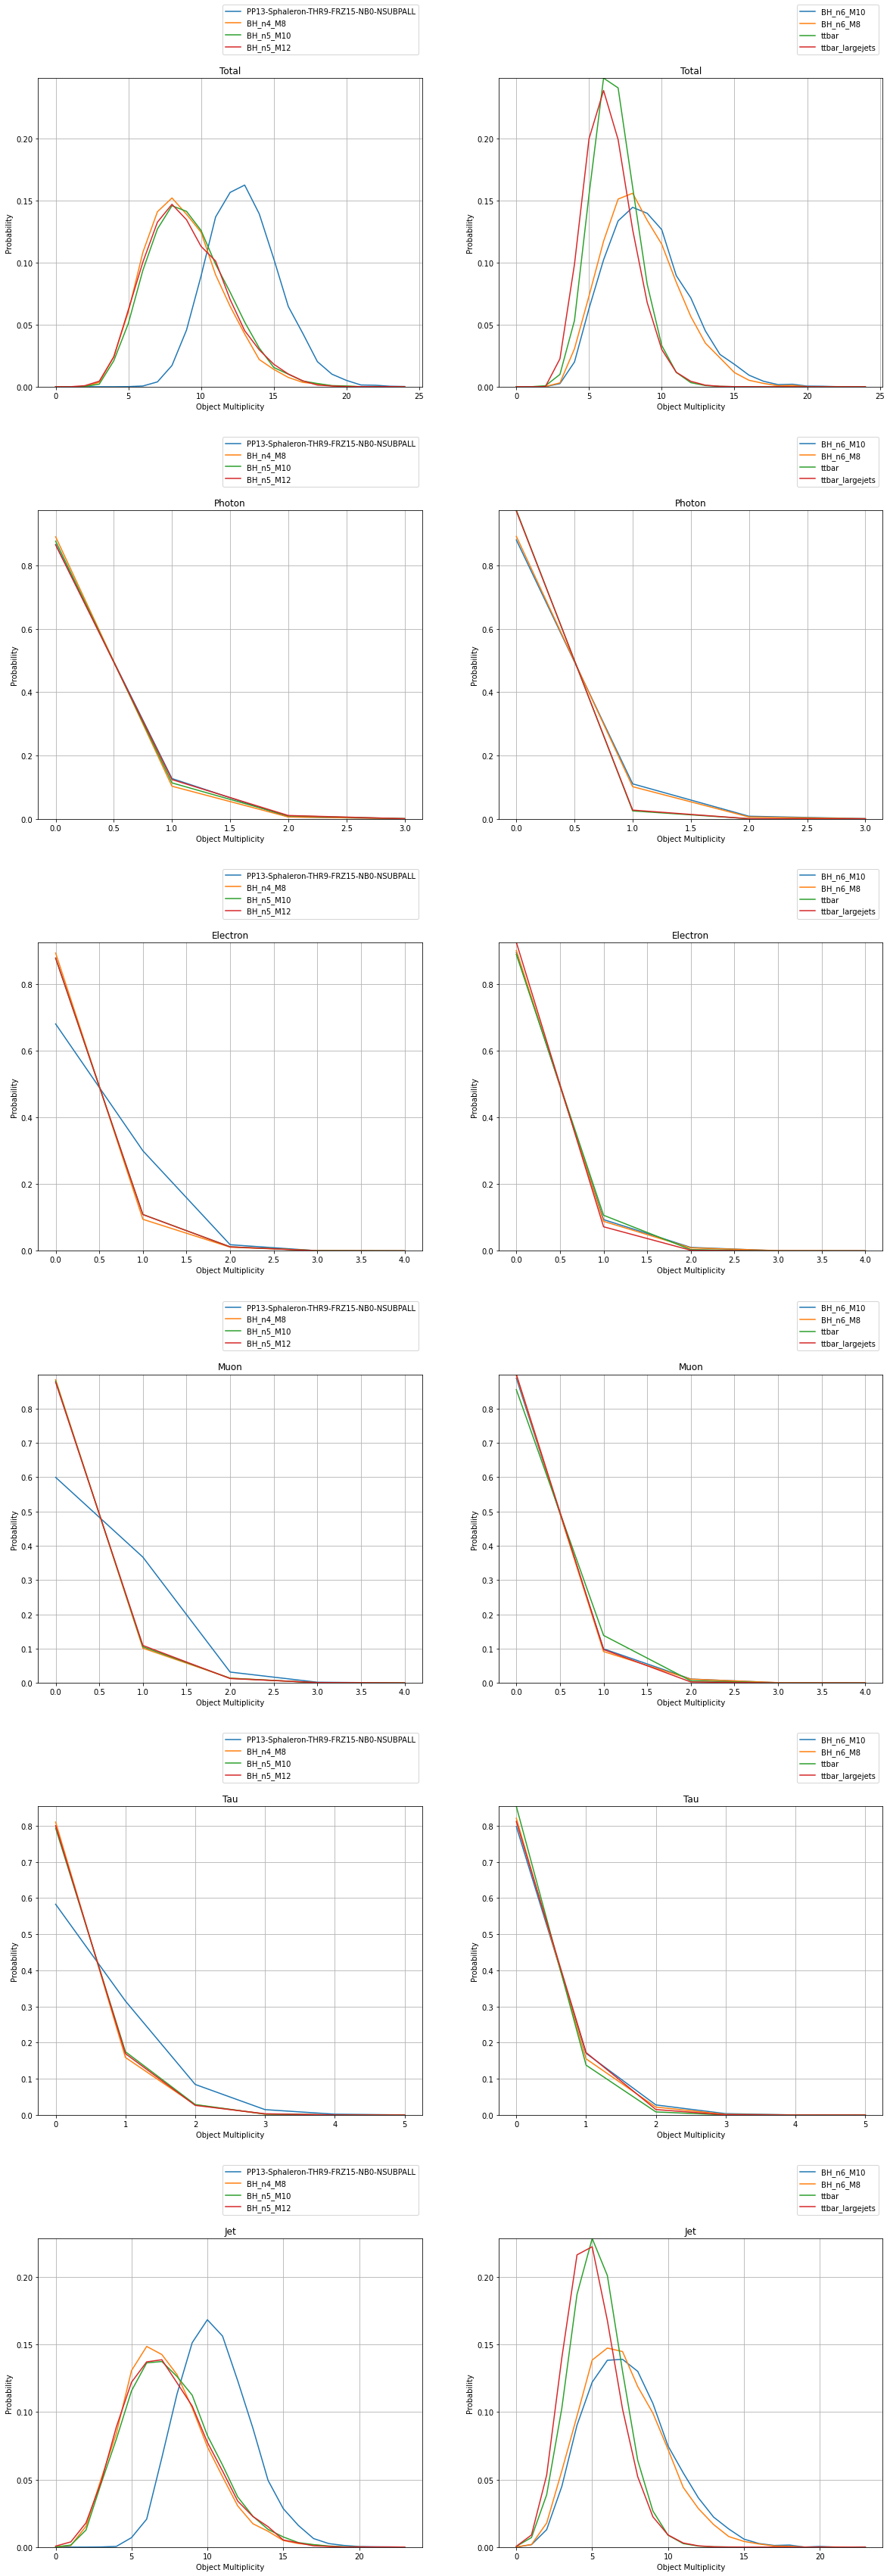

In [12]:
def orderDataSets():
    orderedDataSets = []
    for dataSet in dataSets:
      if dataSet.eventType == 'sphaleron':
        orderedDataSets.append(dataSet)
    for dataSet in dataSets:
      if dataSet.eventType != 'sphaleron':
        orderedDataSets.append(dataSet)
    return orderedDataSets

def plotObjectDistribution():

  def objectsDist(objectTypes):
    counts = []
    for objTypIdx in range(len(objectTypes)):
      countsForObjTyp = []
      if objectTypes[objTypIdx] == 7:
        for dataSetIdx in range(len(orderedDataSets)):
          objectCounts = getObjectCounts(orderedDataSets[dataSetIdx].data)
          countsForObjTyp.append(objectCounts)
      if objectTypes[objTypIdx] != 7:
        for dataSetIdx in range(len(orderedDataSets)):
          objectCounts = getSpecificObjectCounts(orderedDataSets[dataSetIdx].data, objectTypes[objTypIdx])
          countsForObjTyp.append(objectCounts) 
      counts.append(countsForObjTyp)
    return counts

  def padLists(counts):
    for i in counts:
      maxLen = 0
      for j in i:
        if len(j) > maxLen: maxLen = len(j)
      for j in i:
        delta = maxLen - len(j)
        if delta > 0:
          for k in range(delta): j.append(0)
    return counts

  def yLimit(counts):
    yLim = 0
    for i in counts:
      if max(i) > yLim: yLim = max(i)
    return yLim

  def normalize(counts):
    for i in range(len(counts)):
      for j in range(len(counts[i])):
        counts[i][j] = normalizeObjectCounts(counts[i][j])
    return counts

  def plotObjDist(counts,objectTypes):
    nrPlots = 4
    nrRows = len(objectTypes)
    nrCols = math.ceil(len(orderedDataSets)/nrPlots)
    fig = plt.figure(figsize=(nrCols*10,nrRows*10))
    axs = fig.subplots(nrRows, nrCols)

    counts = padLists(counts)
    counts = normalize(counts)

    for i in range(len(counts)):
      yLim = yLimit(counts[i])
      for j in range(len(orderedDataSets)):
        n = j//nrPlots
        if nrCols == 1: idxs = i
        else: idxs = i, n
        ax = axs[idxs]

        ax.plot(range(len(counts[i][j])), counts[i][j], label=orderedDataSets[j].fileName)
        ax.legend(bbox_to_anchor=(1, 1.25))
        plt.subplots_adjust(hspace = 0.4)
        ax.set_ylim(bottom = 0, top = yLim)
        ax.grid(b = True, which = 'both')
        ax.set_xlabel('Object Multiplicity')
        ax.set_ylabel('Probability')
        ax.set_title(f'{inclusiveObjectMapping[objectTypes[i]]}')


  objectTypes = [7, 0, 1, 2, 3, 4]
  orderedDataSets = orderDataSets()
  counts = objectsDist(objectTypes)
  plotObjDist(counts, objectTypes)

plotObjectDistribution()

###PT Plots

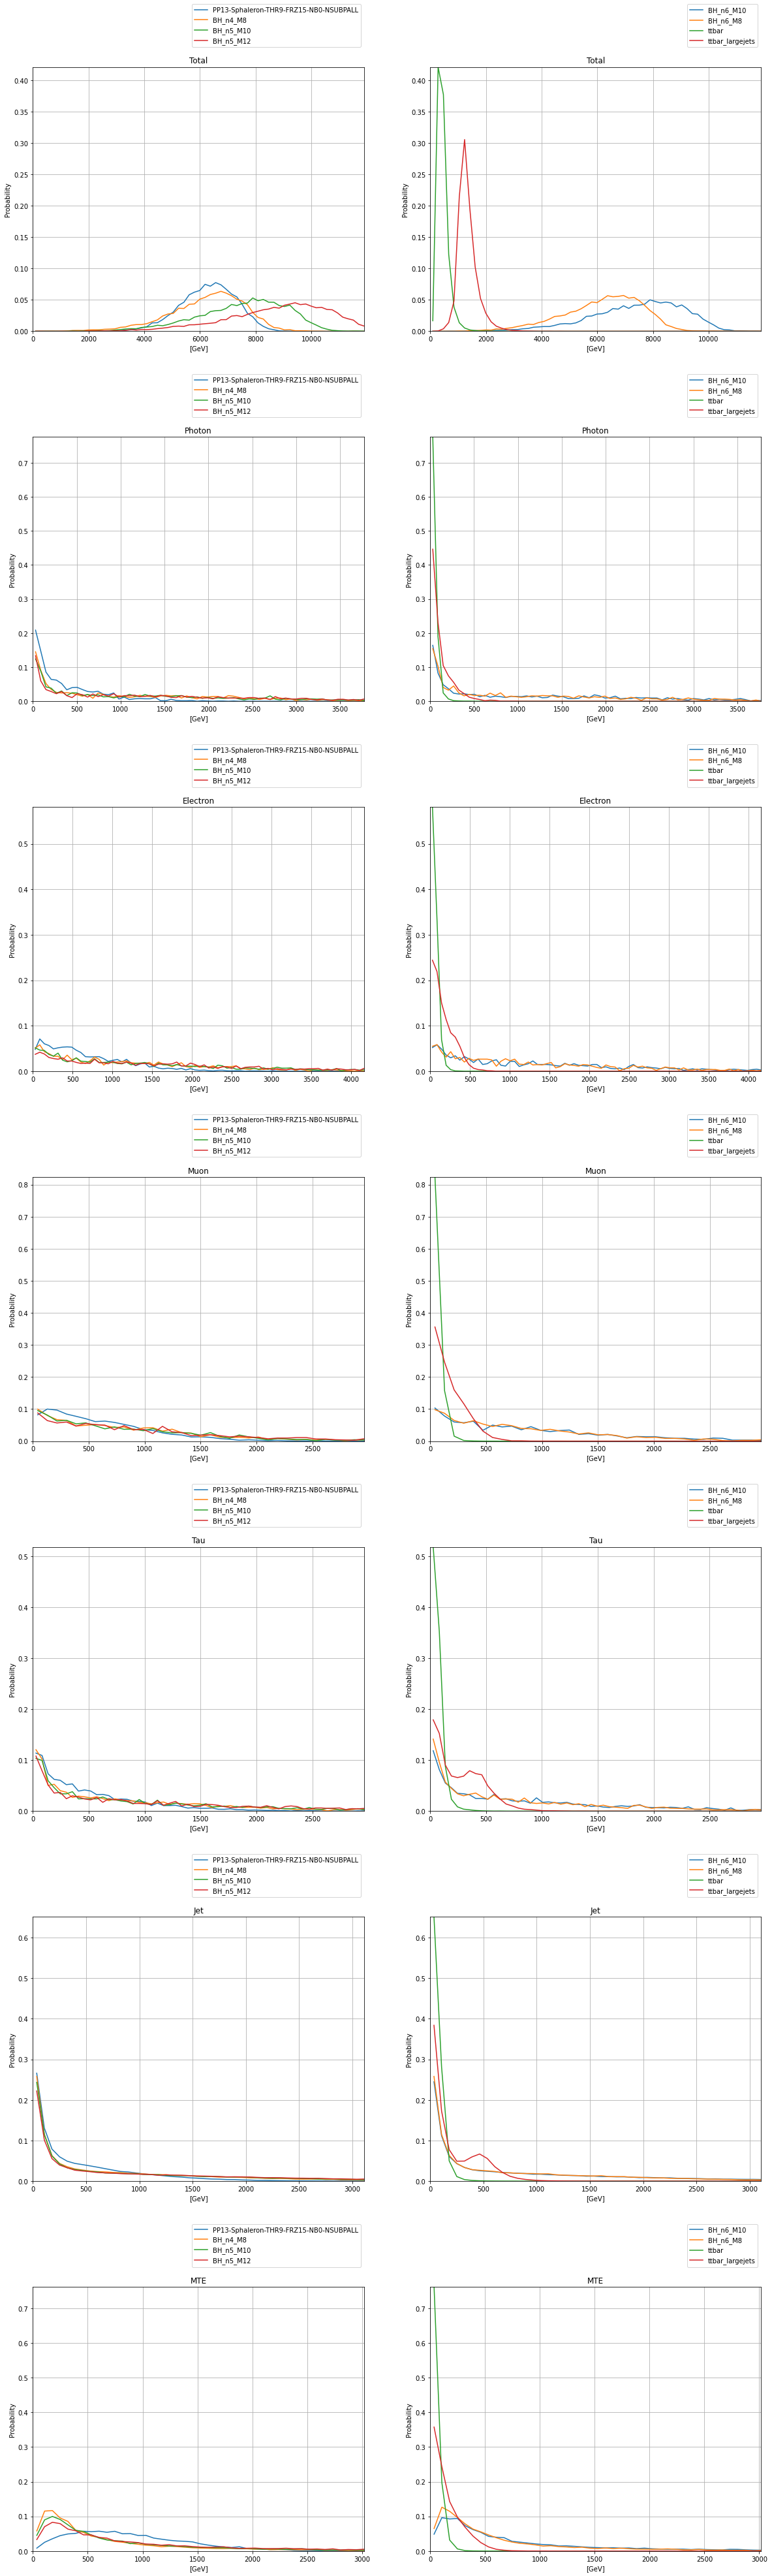

In [13]:
def PTPlots():

  def getPT(orderedDataSets):
    ptList = []

    for objectType in inclusiveObjectMapping:
      PTList1 = []
      for dataSet in orderedDataSets:
        if objectType == 7:
          PTList1.append(sumPT(dataSet.data))
        else:
          PTList1.append(getSpecificObjectEnergy(dataSet.data, objectType))
      if objectType == 7:
        ptList.insert(0, PTList1)
      else:
        ptList.append(PTList1)
    return ptList

  def findMaxValues(list3d):
    maxVals = []
    for i in range(len(list3d)):
      maxVal = 0
      for j in range(len(list3d[i])):
        if maxVal < max(list3d[i][j]):
          maxVal = max(list3d[i][j])
      maxVals.append(maxVal)
    return maxVals

  def createBins(maxVal, binNr=100):
    binLen = maxVal/binNr
    bins = np.arange(0, maxVal+binLen, binLen)
    return bins

  def getCounts(values, bins):
    counts = []
    for i in range(len(values)):
      counts1 = []
      for j in range(len(values[i])):
        count, hist1 = np.histogram(values[i][j], bins[i])
        counts1.append(count)
      counts.append(counts1)

    return counts

  def normalize(counts):
    normalizedCounts = []
    for i in range(len(counts)):
      normCounts = []
      for j in range(len(counts[i])):
        normCounts.append(normalizeObjectCounts(counts[i][j]))
      normalizedCounts.append(normCounts)
    return normalizedCounts

  def xValues(bins):
    xVals = bins[:-1] + (bins[1]-bins[0])/2
    return xVals

  def xLimitIndices(counts):
    xLimIdxs = []
    for i in counts:
      xLimIdx = 0
      for j in i:
        a = np.array(j)
        aboveIdx = np.argwhere(a > 0.005)
        if xLimIdx < aboveIdx[-1]: xLimIdx = aboveIdx[-1]
      xLimIdxs.append(xLimIdx)
    return xLimIdxs

  def plotPT(counts, bins, orderedDataSets, maxCounts, xLimIdxs):
    objectTypes = [7, 0, 1, 2, 3, 4, 6]
    nrPlots = 4
    nrCols = math.ceil(len(orderedDataSets)/nrPlots)
    nrRows = len(objectTypes)

    fig = plt.figure(figsize=(nrCols*10, nrRows*10))
    axs = fig.subplots(nrRows, nrCols)

    for i in range(len(counts)):
      xVals = xValues(bins[i])
      for j in range(len(counts[i])):
        if nrRows > nrPlots:
          n = j//nrPlots
          idxs = i,n
        else: idxs = i
        ax = axs[idxs]
        ax.plot(xVals, counts[i][j], label=f'{orderedDataSets[j].fileName}')
        
    for i in range(nrRows):
      xVals = xValues(bins[i])
      xLim = xVals[xLimIdxs[i]]
      for j in range(nrCols):
        if nrRows > nrPlots:
          idxs = i,j
        else: idxs = i
        ax = axs[idxs]
        ax.legend(bbox_to_anchor=(1, 1.25))
        ax.set_title(inclusiveObjectMapping[objectTypes[i]])
        plt.subplots_adjust(hspace = 0.4)
        ax.set_xlabel("[GeV]")
        ax.set_ylabel("Probability")
        ax.set_ylim(0,maxCounts[i])
        ax.set_xlim(0,xLim)
        ax.grid()

  def run1():

    orderedDataSets = orderDataSets()
    ptList = getPT(orderedDataSets)
    maxValues = findMaxValues(ptList)
    bins = []
    for maxVal in maxValues:
      bins.append(createBins(maxVal))
    counts = getCounts(ptList, bins)
    counts = normalize(counts)
    maxCounts = findMaxValues(counts)
    xLimIdxs = xLimitIndices(counts)
    
    plotPT(counts,bins, orderedDataSets, maxCounts, xLimIdxs)

    plt.show()

  run1()

PTPlots()

### Z Bosons


 

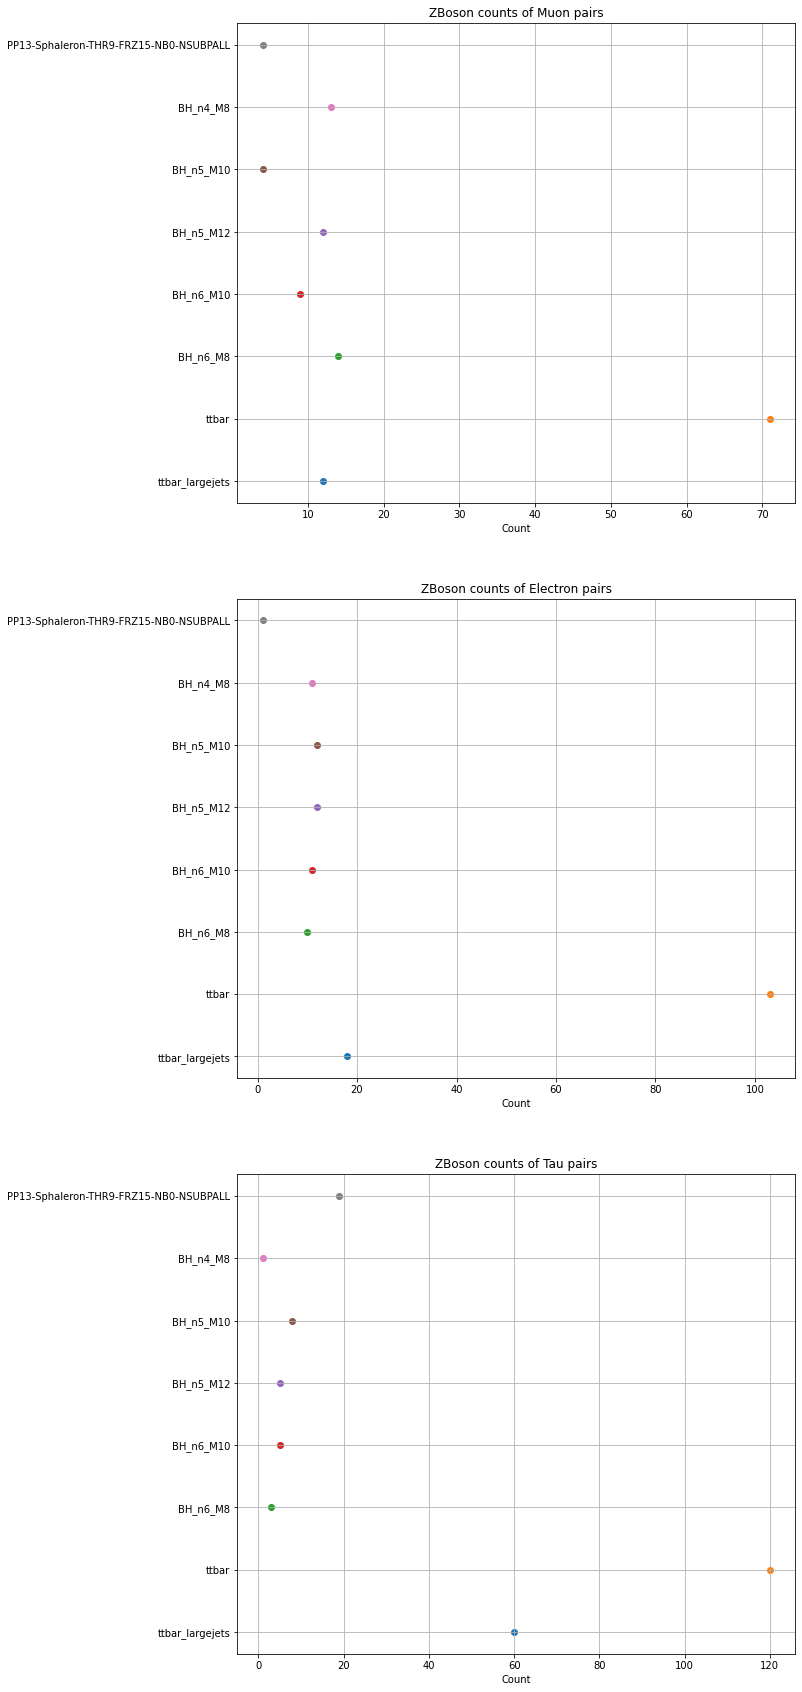

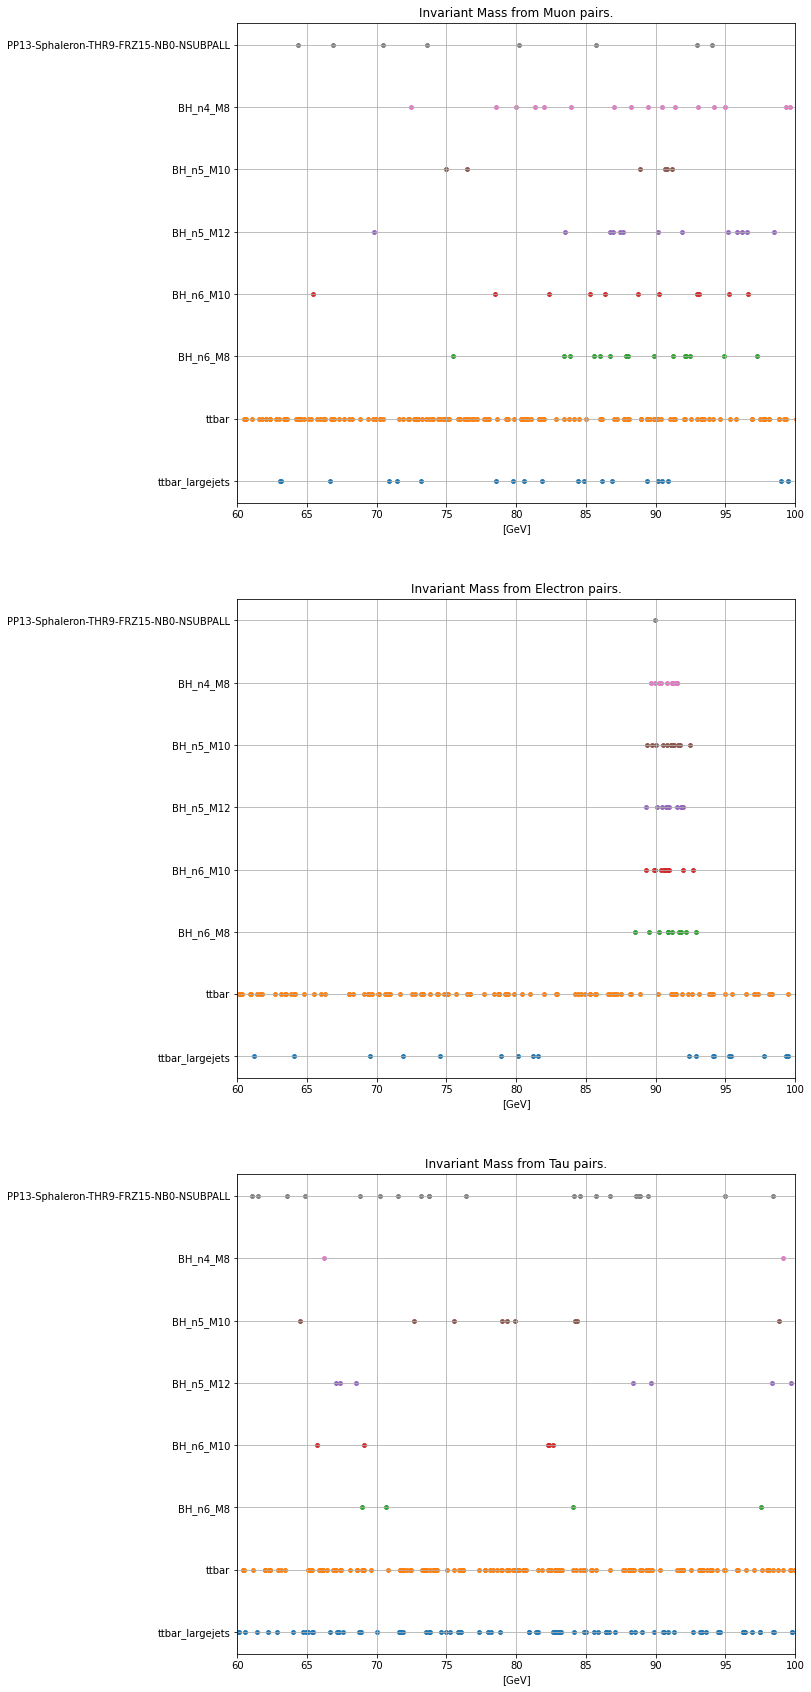

In [14]:
def zBosons():

  def getRelevantObjects(event):
    muons = []
    electrons = []
    taus = []

    for obj in event:
      cond1 = obj[colmapper['typ']] == objectMappingReverse['Muon']
      cond2 = obj[colmapper['typ']] == objectMappingReverse['Electron']
      cond3 = obj[colmapper['typ']] == objectMappingReverse['Tau']
      if not (cond1 or cond2 or cond3): continue

      if cond1: muons.append(obj)
      if cond2: electrons.append(obj)
      if cond3: taus.append(obj)

    return muons, electrons, taus

  def calcInvMass(posNrgs, posEtas ,posPhis ,negNrgs, negEtas, negPhis):
    invariantMassSquared = (2*posNrgs*negNrgs)*(math.cosh(posEtas - negEtas) - math.cos(posPhis - negPhis))
    invariantMass = math.sqrt(invariantMassSquared)
    return invariantMass

  def calcInvMass1(posNrgs, posEtas ,posPhis ,negNrgs, negEtas, negPhis):
    invariantMasses = []
    for i in range(len(posNrgs)):
      invariantMass = calcInvMass(posNrgs[i], posEtas[i] ,posPhis[i] ,negNrgs, negEtas, negPhis)
      invariantMasses.append(invariantMass)
    return invariantMasses

  def calcInvMass2(posNrgs, posEtas ,posPhis ,negNrgs, negEtas, negPhis):
    invariantMasses = []
    for i in range(len(negNrgs)):
      invariantMass = calcInvMass(posNrgs, posEtas ,posPhis ,negNrgs[i], negEtas[i], negPhis[i])
      invariantMasses.append(invariantMass)
    return invariantMasses

  def calcInvMass3(posNrgs, posEtas ,posPhis ,negNrgs, negEtas, negPhis):
    invariantMasses = []
    for i in range(len(posNrgs)):
      invariantMasses1 = []
      for j in range(len(negNrgs)):
        invariantMass = calcInvMass(posNrgs[i], posEtas[i] ,posPhis[i] ,negNrgs[j], negEtas[j], negPhis[j])
        invariantMasses1.append(invariantMass)
      invariantMasses.append(invariantMasses1)
    return invariantMasses

  def closestInvariantMass(invariantMasses, objTyp):

    targetMasses = [90, 80, 75]     #må høre med elektronene
    invMasses = np.array(invariantMasses)
    shape = np.shape(invMasses)
    deltaMasses = np.absolute(invMasses - targetMasses[objTyp])
    if len(shape) == 1:
      idx = np.argmin(deltaMasses)
      invariantMassesOutput = invMasses[idx]
      return [invariantMassesOutput]
    
    invariantMassesOutput = []
    for i in range(min(shape)):
      idxs = np.unravel_index(np.argmin(deltaMasses),deltaMasses.shape)
      invariantMassesOutput.append(invMasses[idxs])
      deltaMasses = np.delete(deltaMasses, idxs[0], axis=0)
      deltaMasses = np.delete(deltaMasses, idxs[1], axis=1)
      invMasses = np.delete(invMasses, idxs[0], axis=0)
      invMasses = np.delete(invMasses, idxs[1], axis=1)

    return invariantMassesOutput

  def getInvariantMass(objects, objTyp):

    if len(objects) < 2: return []  #None
    objs = np.array(objects)
    objectNtrk = objs[:,colmapper['ntrk']]
    objectCharges = objectNtrk > 0

    if objectCharges.all() or not objectCharges.any(): return []  #None

    objectEnergies = objs[:,colmapper['pt']]
    positiveObjectEnergies = np.extract(objectCharges, objectEnergies)
    negativeObjectEnergies = np.extract(np.invert(objectCharges), objectEnergies)
    
    objectEtas = objs[:,colmapper['eta']]
    positiveObjectEtas = np.extract(objectCharges, objectEtas)
    negativeObjectEtas = np.extract(np.invert(objectCharges), objectEtas)

    objectPhis = objs[:,colmapper['phi']]
    positiveObjectPhis = np.extract(objectCharges, objectPhis)
    negativeObjectPhis = np.extract(np.invert(objectCharges), objectPhis)

    unique, counts, = np.unique(objectCharges, return_counts=True)

    cond1 = len(positiveObjectEnergies) > 1
    cond2 = len(negativeObjectEnergies) > 1
    cond3 = (not cond1) and (not cond2)
    cond4 = cond1 and (not cond2)
    cond5 = (not cond1) and cond2
    cond6 = cond1 and cond2
    
    if cond3:   #Bare 1 mulig
      invMasses = calcInvMass(positiveObjectEnergies, positiveObjectEtas ,positiveObjectPhis ,negativeObjectEnergies, negativeObjectEtas, negativeObjectPhis)
      return [invMasses]

    elif cond4:    #1 Z_boson, flere muligheter
      invMasses = calcInvMass1(positiveObjectEnergies, positiveObjectEtas ,positiveObjectPhis ,negativeObjectEnergies, negativeObjectEtas, negativeObjectPhis)
    
    elif cond5:    #1 Z_boson, flere muligheter
      invMasses = calcInvMass2(positiveObjectEnergies, positiveObjectEtas ,positiveObjectPhis ,negativeObjectEnergies, negativeObjectEtas, negativeObjectPhis)

    elif cond6:    # minst 2 Z_bosoner
      invMasses = calcInvMass3(positiveObjectEnergies, positiveObjectEtas ,positiveObjectPhis ,negativeObjectEnergies, negativeObjectEtas, negativeObjectPhis)

    invMasses = closestInvariantMass(invMasses,objTyp)
    
    return invMasses

  def prepareDataForCalc(dataSet):
    
    muonsList = []
    electronsList = []
    tausList = []

    for event in dataSet.data:
      muons, electrons, taus = getRelevantObjects(event)
      muonsList.append(muons)
      electronsList.append(electrons)
      tausList.append(taus)

    return muonsList, electronsList, tausList

  def getInvariantMassesBosons(objectList, objTyp):
    bosonsMasses = []
    for obj in objectList:
      if obj == []:
        bosonsMasses.append([])
      if obj != []:
        bosonsMasses.append(getInvariantMass(obj, objTyp))
    return bosonsMasses

  def invariantMasses(dataSet):
    
    muonsList, electronsList, tausList = prepareDataForCalc(dataSet)
    muonBosonMasses = getInvariantMassesBosons(muonsList, 0)
    electronBosonMasses = getInvariantMassesBosons(electronsList, 1)
    tauBosonMasses = getInvariantMassesBosons(tausList, 2)

    return muonBosonMasses, electronBosonMasses, tauBosonMasses

  def checkIfBoson(event, minMass, maxMass):
    
    if len(event) == 1:
      if event[0] >= minMass and event[0] <= maxMass:
        nrBosons = 1
        return nrBosons
    
    nrBosons = 0
    for mass in event:
      if mass > minMass and mass < maxMass:
        nrBosons += 1
    
    return nrBosons

  def countBosons(bosonMasses, objTyp):
    count = np.zeros(10, dtype=int)
    if objTyp == 0:
      for event in bosonMasses:
        if event == []: count[0] += 1; continue
        nrBosons = checkIfBoson(event, 80, 100)
        count[nrBosons] += 1
    if objTyp == 1:
      for event in bosonMasses:
        if event == []: count[0] += 1; continue
        nrBosons = checkIfBoson(event, 60, 100)
        count[nrBosons] += 1
    if objTyp == 2:
      for event in bosonMasses:
        if event == []: count[0] += 1; continue
        nrBosons = checkIfBoson(event, 60, 90)
        count[nrBosons] += 1
    return count

  def cleanMasses(bosonMasses):
    bMasses = []
    for element in bosonMasses:
      if element == []: continue
      if element != []: bMasses.append(element)
    return bMasses

  def cleanMasses2(bosonMasses):
    bMasses = []
    for element in bosonMasses:
      for i in range(len(element)):
        bMasses.append(element[i])
    return bMasses

  def cMass(bosonMasses):
    bosonMasses = cleanMasses(bosonMasses)
    bosonMasses = cleanMasses2(bosonMasses)
    return bosonMasses

  def prepData(orderedDataSets):

    muonCount = []
    electronCount = []
    tauCount = []
    cleanMuonMasses = []
    cleanElectronMasses = []
    cleanTauMasses = []

    for dataSet in orderedDataSets:
      muonBosonMasses, electronBosonMasses, tauBosonMasses = invariantMasses(dataSet)
      
      muonCount.append(countBosons(muonBosonMasses, 0))
      electronCount.append(countBosons(electronBosonMasses, 1))
      tauCount.append(countBosons(tauBosonMasses, 2))

      cleanMuonMasses.append(cMass(muonBosonMasses))
      cleanElectronMasses.append(cMass(electronBosonMasses))
      cleanTauMasses.append(cMass(tauBosonMasses))

    bosonCounts = [muonCount, electronCount, tauCount]
    cleanBosonMasses = [cleanMuonMasses, cleanElectronMasses, cleanTauMasses]

    return bosonCounts, cleanBosonMasses

  def getBins(nrBins, limits):
    binLen = (limits[1]-limits[0])/nrBins
    bins = np.arange(limits[0], limits[1]+binLen, binLen)
    return bins

  def countMasses(cleanBosonMasses, bins, orderedDataSets):
    countedMasses = []
    for objectMasses in cleanBosonMasses:
      countedObjMasses = []
      for dataSetIdx in range(len(orderedDataSets)):
        hist, binsa = np.histogram(objectMasses[dataSetIdx],bins)
        countedObjMasses.append(hist)
      countedMasses.append(countedObjMasses)
    return countedMasses, bins

  def recount(cleanBosonMasses, orderedDataSets ,limits):
    counts = []
    for i in range(len(cleanBosonMasses)):
      counts1 = []
      for j in range(len(orderedDataSets)):
        count = 0
        for mass in cleanBosonMasses[i][j]:
          if mass >= limits[i][0] and mass <= limits[i][1]: count += 1
        counts1.append(count)
      counts.append(counts1)
    return counts


  def plotCounts(bosonCounts, orderedDataSets):
    nrRows = len(bosonCounts)
    fig = plt.figure(figsize=(10,10*nrRows))
    axs = fig.subplots(nrRows, 1)
    objTyp = [2, 1, 3]
    for objIdx in range(len(bosonCounts)):
      ax = axs[objIdx]
      for setIdx in range(len(orderedDataSets)):
        max = 0
        counts = bosonCounts[objIdx][-1 -setIdx]
        yVals = setIdx
        ax.scatter(counts, yVals)
      yTicks = np.arange(len(orderedDataSets))
      ax.set_yticks(yTicks)
      ax.set_yticklabels([orderedDataSets[-1 -i].fileName for i in range(len(orderedDataSets))])
      ax.set_xlabel('Count')
      ax.set_title(f'ZBoson counts of {objectMapping[objTyp[objIdx]]} pairs')
      ax.grid(b = True, which = 'both')




  # def plotCounts(bosonCounts, orderedDataSets):
  #   nrPlots = 4
  #   nrRows = len(bosonCounts)
  #   nrCols = math.ceil(len(orderedDataSets)/nrPlots)
  #   fig = plt.figure(figsize=(10*nrCols,10*nrRows))
  #   axs = fig.subplots(nrRows, nrCols)
  #   objTyp = [2, 1, 3]
    
  #   for objIdx in range(len(bosonCounts)):
  #     for setIdx in range(len(orderedDataSets)):
        
  #       counts = bosonCounts[objIdx][setIdx]
  #       maxCount = np.max(np.argwhere(counts))
  #       counts = counts[1:maxCount+1]
  #       #counts = normalizeObjectCounts(counts[:maxCount+1])
  #       xVals = np.arange(1,(maxCount+1))


  #       if nrCols > 1:
  #         n = setIdx//nrPlots
  #         idxs = objIdx, n
  #       else:
  #         idxs = objIdx

  #       axs[idxs].scatter(xVals,counts, label=f'{orderedDataSets[setIdx].fileName}')
  #   for m in range(nrRows):
  #     for n in range(nrCols):
  #       if nrCols == 1:
  #         ax = axs[m]
  #       if nrCols > 1:
  #         ax = axs[m,n]
  #       ax.set_title(f'bosons from {objectMapping[objTyp[m]]} pairs')
  #       ax.set_xlabel(f'nr bosons')
  #       ax.set_ylabel(f'counts')
  #       ax.legend()
  #       ax.grid()

  def plotInvMass(massCount, orderedDataSets):
    nrRows = len(massCount)
    
    fig = plt.figure(figsize = (10, 10*nrRows))
    axs = fig.subplots(nrRows, 1)
    objTyp = [2,1,3]
    
    for objIdx in range(len(massCount)):
      i = 0
      for setIdx in range(len(orderedDataSets)):
        xVals = massCount[objIdx][-1 -setIdx]
        yVals = np.arange(len(xVals))
        yVals.fill(i)
        i += 1
        axs[objIdx].scatter(xVals, yVals, s=15)

        
    for m in range(len(massCount)):
      ax = axs[m]
      yTicks = np.arange(len(orderedDataSets))
      ax.set_yticks(yTicks)
      ax.set_yticklabels([orderedDataSets[-1 -i].fileName for i in range(len(orderedDataSets))])
      ax.set_xlabel('[GeV]')
      ax.set_title(f'Invariant Mass from {objectMapping[objTyp[m]]} pairs.')
      ax.grid()
      ax.set_xlim(60,100)
      # if m == 0:
      #   ax.set_xlim(80,100)
      # if m == 1:
      #   ax.set_xlim(60,100)
      # if m == 2:
      #   ax.set_xlim(60,90)

  # def plotInvMass(massCount, bins, orderedDataSets):
  #   nrPlots = 4
  #   nrRows = len(massCount)
  #   nrCols = math.ceil(len(orderedDataSets)/nrPlots)
  #   fig = plt.figure(figsize=(10*nrCols,10*nrRows))
  #   axs = fig.subplots(nrRows, nrCols)
  #   objTyp = [2,1,3]

  #   for objIdx in range(len(massCount)):

  #     for setIdx in range(len(orderedDataSets)):
  #       if setIdx % nrPlots == 0: i = 0
  #       xVals = massCount[objIdx][setIdx]
  #       yVals = np.arange(len(xVals))
  #       yVals.fill(i)
  #       #xVals = bins[:-1] + (bins[1]-bins[0])/2
  #       #yVals = normalizeObjectCounts(yVals)
  #       i += 1
  #       if nrCols > 1:
  #         n = setIdx//nrPlots
  #         idxs = objIdx, n
  #       else:
  #         idxs = objIdx
        
  #       axs[idxs].scatter(xVals, yVals, label=f'{orderedDataSets[setIdx].fileName}')
    
  #   for m in range(nrRows):
  #     for n in range(nrCols):
  #       if nrCols == 1:
  #         ax = axs[m]
  #       if nrCols > 1:
  #         ax = axs[m,n]

  #       yTicks = [orderedDataSets[m + i].fileName for i in range(nrPlots)]

  #       ax.set_title(f'Invariant Masses of {objectMapping[objTyp[m]]} pairs')
  #       ax.set_xlabel(f'[GeV]')
  #       ax.set_yticks(np.arange(nrPlots))
  #       ax.set_yticklabels(yTicks)
  #       #ax.set_ylabel(f'Probability')
  #       #ax.set_xlim(0,200)
  #       ax.legend()
  #       ax.grid()
        
  #       if m == 0:
  #         ax.set_xlim(80,100)
  #       if m == 1:
  #         ax.set_xlim(60,100)
  #       if m == 2:
  #         ax.set_xlim(60,90)

  def run1():
    orderedDataSets = orderDataSets()
    bosonCounts, cleanBosonMasses = prepData(orderedDataSets)
    limits = [
              [80, 100],
              [60, 100],
              [60, 90]
    ]
    counts = recount(cleanBosonMasses, orderedDataSets, limits)
    plotCounts(counts, orderedDataSets)
    bins = getBins(50, [60,100])
    #massCount, bins = countMasses(cleanBosonMasses, bins, orderedDataSets)
    
    plotInvMass(cleanBosonMasses, orderedDataSets)    
    


  run1()
  
zBosons()

###MTE/PT

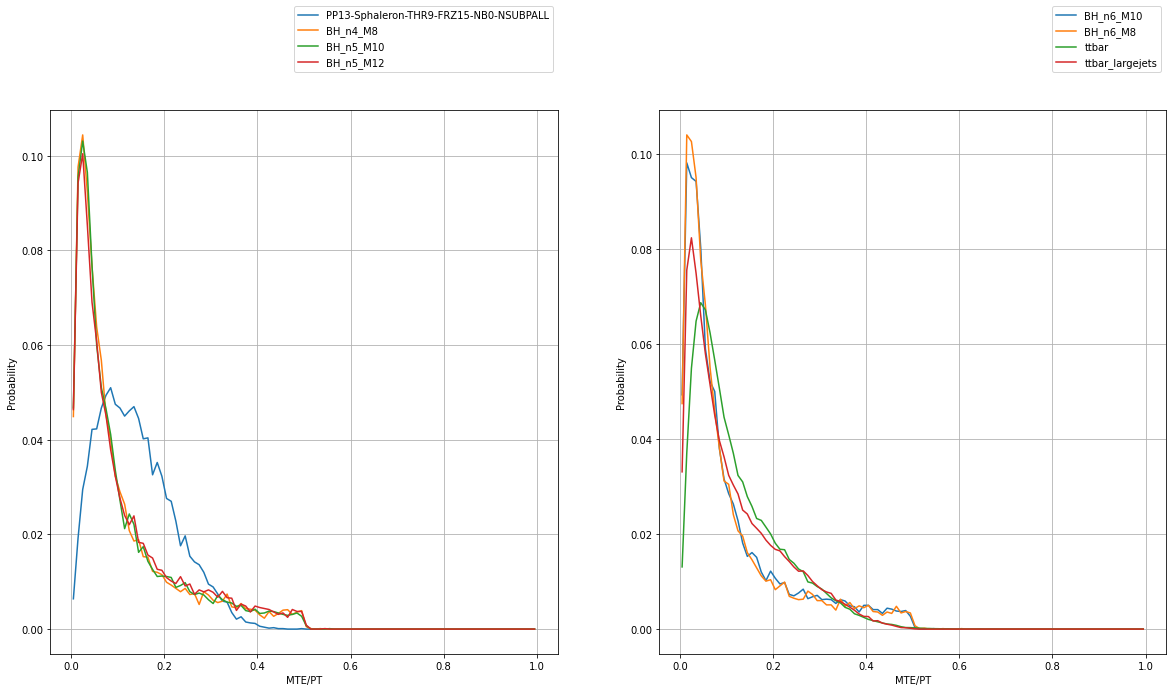

In [15]:

def MTEPTRatio(dataSet):
  objectTypes1 = [0, 1, 2, 3, 4, 6]
  objectTypes2 = [6]

  PTList1 = sumPTCustom(dataSet.data, objectTypes1)
  PTList2 = sumPTCustom(dataSet.data, objectTypes2)
  MTEPTRatio = []
  if not len(PTList1) == len(PTList2):
    print(f"Lengths of lists does not match: {dataSet.fileName}")
  else:
    for i in range(len(PTList1)):
      if PTList1[i] == 0:
        print(f"event {i} no PT {dataSet.fileName}")

      if PTList2[i] == 0:
        print(f"event {i} no MTE {dataSet.fileName}")
      
      if PTList1[i] == 0:
        ratio = 1
      else:
        ratio = PTList2[i]/PTList1[i]
      MTEPTRatio.append(ratio)
    MTEPTRatio = np.array(MTEPTRatio)
  return MTEPTRatio


def MTEPTRatioPlot():

  def useSinglePlot():
    if len(orderedDataSets) > nrOfPlots: return False
    else: return True

  def MTEPTRatioArray():
    ratios = []
    for dataSetIdx in range(len(orderedDataSets)):
      ratios.append(MTEPTRatio(orderedDataSets[dataSetIdx]))
    # ratios = np.array(ratios)
    return ratios

  def bins():
    bins = np.arange(0,1.01,0.01)
    return bins

  def xValues():
    xValues = bins[:-1]
    xValues = xValues + xValues[1]/2
    return xValues

  def countRatios():
    counts = []
    for dataSetIdx in range(len(orderedDataSets)):
      countArr = []
      ratioArr = ratios[dataSetIdx]
      for i in range(len(bins)-1):
        condition1 = ratioArr > bins[i]
        condition2 = ratioArr < bins[i+1]
        condition = np.logical_and(condition1, condition2)
        count = np.count_nonzero(condition)
        countArr.append(count)
      countArr = np.array(countArr)
      counts.append(countArr)
    return counts

  def normCounts():
    normalizedCounts = []
    for dataSetIdx in range(len(orderedDataSets)):
      normalizedCounts.append(np.array(normalizeObjectCounts(counts[dataSetIdx])))
    # normalizedCounts = np.array(normalizedCounts)
    return normalizedCounts
  
  def createFigure():
    
    nrOfCols = math.ceil(len(dataSets)/nrOfPlots)
    fig = plt.figure(figsize=(nrOfCols*10,10))
    axs = fig.subplots(nrOfRows, nrOfCols)
    
    return fig, axs

  def fillAxs():

    if singlePlot:
      for dataSetIdx in range(len(orderedDataSets)):
        axs.plot(xValues, counts[dataSetIdx], label = orderedDataSets[dataSetIdx].fileName)
    else:
      for dataSetIdx in range(len(orderedDataSets)):
        axNr = math.floor(dataSetIdx/nrOfPlots)
        axs[axNr].plot(xValues, counts[dataSetIdx], label = orderedDataSets[dataSetIdx].fileName)

      

  def setYLim():
    for dataSetIdx in range(len(orderedDataSets)):
      maxCounts = np.amax(counts[dataSetIdx])
      
  def plotAxs():
    if singlePlot:
      axs.legend(bbox_to_anchor=(1, 1.2))
      axs.grid()
      axs.set_ylabel('Probability')
      axs.set_xlabel('MTE/PT')
    else:
      for ax in axs:
        ax.legend(bbox_to_anchor=(1, 1.2))
        ax.grid()
        ax.set_ylabel('Probability')
        ax.set_xlabel('MTE/PT')
    fig.show()

  

  nrOfRows = 1
  nrOfPlots = 4

  orderedDataSets = orderDataSets()
  singlePlot = useSinglePlot()
  ratios = MTEPTRatioArray()
  bins = bins()
  xValues = xValues()
  counts = countRatios()
  counts = normCounts()
  fig, axs = createFigure()
  filledAxs = fillAxs()
  setYLim()
  plotAxs()

MTEPTRatioPlot()

###Eta Phi

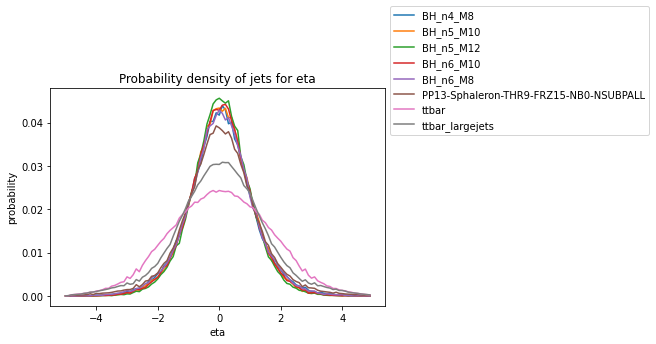

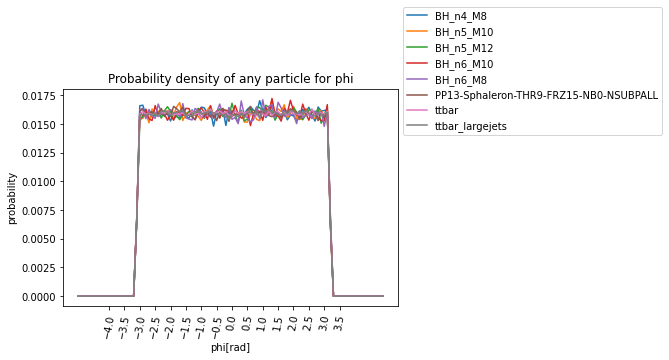

In [16]:
#Eta distribution of jets

def getAllEtas(dataSet):
  objectType = 4
  etaValues = []
  for matrix in dataSet.data:
    for obj in matrix:
      if obj[0] == objectType:
        etaValues.append(obj[colmapper["eta"]])
  return etaValues

def plotAllEtaNormalizedDist():
  etas = {} 
  bins = np.arange(-5.0, 5.0, 0.1)
  for dataSet in dataSets:
    hist, bins = np.histogram(getAllEtas(dataSet), bins)
    normalizedHist = normalizeObjectCounts(hist)
    plt.plot(bins, np.pad(normalizedHist, (1,0)), label = dataSet.fileName)
    plt.title('Probability density of jets for eta')
    plt.xlabel('eta')
    plt.grid()
    plt.ylabel('probability')

  #plt.legend(loc="upper left")
  plt.legend(bbox_to_anchor=(1, 1.4))
  plt.show()

#Phi distribution

def getAllPhis(dataSet):
  phiValues = []
  for matrix in dataSet.data:
    for obj in matrix:
        phiValues.append(obj[colmapper["phi"]])
  return phiValues

def plotAllPhiNormalizedDist():
  etas = {} 
  bins = np.arange(-5.0, 5.0, 0.1)
  for dataSet in dataSets:
    hist, bins = np.histogram(getAllPhis(dataSet), bins)
    normalizedHist = normalizeObjectCounts(hist)
    plt.plot(bins, np.pad(normalizedHist, (1,0)), label = dataSet.fileName)
    plt.grid()
    plt.xticks(np.arange(-4,4,0.5), rotation = 80)
    plt.xlabel('phi[rad]')
    plt.ylabel('probability')
    plt.title('Probability density of any particle for phi')
  plt.legend(bbox_to_anchor=(1, 1.4))
  plt.show()

plotAllEtaNormalizedDist()
plotAllPhiNormalizedDist()

In [17]:
def standardDeviance2D(etaValues):
  std = []
  for etaVals in etaValues:
    std.append(statistics.stdev(etaVals))
  return std

def mean2D(etaValues):
  mean = []
  for etaVals in etaValues:
    mean.append(statistics.mean(etaVals))
  return mean

#Imaging
per dataset:
  1. summer energi per objekt-type & plot i ett image per objekt-type
  2. finn maxval per objekt-type
  3. normaliser alle imager basert på maxval for sin objekt-type
  4. slå sammen imager for electron, muon og jets per event

In [18]:
def normalizeEnergyImages(objTypeToMaxVal, imageSet):
  normalizedImages = {}
  for imageKey in imageSet:                  
    filename, eventNr, objectType = imageKey
    image = imageSet[imageKey]
    currMaxVal = objTypeToMaxVal[objectType]
    for coord in image:
      x, y = coord
      image[(x, y)] = int(255*(image[(x, y)]/currMaxVal))
    normalizedImages[(imageKey)] = image
  return normalizedImages

In [19]:
def energyObject(pt, eta, mass=0.):
  theta = 2. * np.arctan(np.exp(-eta))
  absMomentum = pt / np.sin(theta)
  energy = (absMomentum**2 + mass*2)**0.5
  return energy

In [20]:
def createEtaPhiBinnedImages(dataSet, 
                             imageHeight, 
                             imageWidth, 
                             maxEta, 
                             minEta, 
                             maxPhi, 
                             minPhi):
  objTypeToMaxVal = {}
  images = {}
  scalingFactorEta = imageWidth/(maxEta-minEta)
  scalingFactorPhi = imageHeight/(maxPhi-minPhi)
  for objectType in objectMapping:
    objTypeToMaxVal[objectType] = 0
  for i, event in enumerate(dataSet.data):
    totalPt = 0
    mte = 0

    for objectType in objectMapping:
      image = {}
      for obj in event:
        if int(obj[colmapper["typ"]]) != int(objectType) :
          continue
        if obj[colmapper["eta"]] < minEta or obj[colmapper["eta"]] > maxEta:
          continue
        eta = obj[colmapper["eta"]] + abs(minEta)
        convertedEta = max(0, round(eta*scalingFactorEta)-1) 

        phi = obj[colmapper["phi"]] + abs(minPhi)
        convertedPhi = max(0, round(phi*scalingFactorPhi)-1)

        pT = obj[colmapper["pt"]]
        energyP = energyObject(pT, obj[colmapper["eta"]], obj[colmapper["jmass"]])


        image[(convertedEta, convertedPhi)] = energyP + image.get((convertedEta, convertedPhi), 0) 

        objTypeToMaxVal[objectType] = max(objTypeToMaxVal[objectType], image[(convertedEta, convertedPhi)] )

      images[(dataSet.fileName, i, objectType)] = image
  return (objTypeToMaxVal, images)

In [26]:
def fillBlanksInImage(sparseImage, height, width):
  newImage = [[ 0 for x in range(0,height)] for y in range(0,width)]
  for coord in sparseImage:
    x, y = coord
    newImage[x][y] = sparseImage[coord]
  return newImage

In [22]:
def mergeImages(height, width, redImage = {}, greenImage = {}, blueImage = {}):
    newImage = [[ (0, 0, 0) for x in range(0,height)] for y in range(0,width)]
    for coord in redImage:
      x, y = coord
      newImage[x][y] += (redImage[coord], 0, 0)
    for coord in greenImage:
      x, y = coord
      newImage[x][y] += (0, greenImage[coord], 0)
    for coord in blueImage:
      x, y = coord
      newImage[x][y] += (0, 0, blueImage[coord])
    return newImage

In [23]:
def mergeImageSparse(*dataChannels):
  channels = len(dataChannels)
  newImage = {}
  for idx, dataChannel in enumerate(dataChannels):
    for coord in dataChannel:
      res = [0] * channels
      res[idx] = dataChannel[coord] 
      res = tuple(res)
      newImage[coord] = tuple(map(lambda x, y: x + y, newImage.get(coord, tuple(0 for _ in range(channels))), res))
  return newImage

electron = red, muon = green, jet = blue

('BH_n4_M8', 0)
594


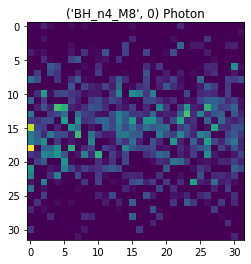

('BH_n4_M8', 1)
552


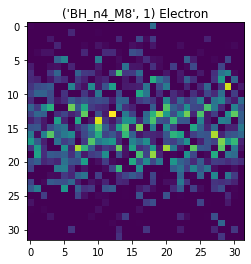

('BH_n4_M8', 2)
621


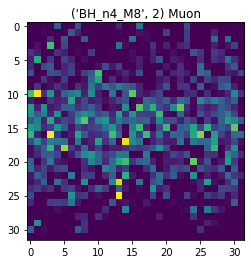

('BH_n4_M8', 3)
709


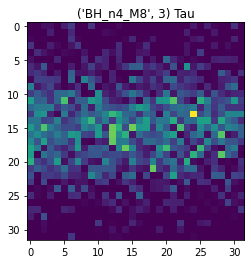

('BH_n4_M8', 4)
1023


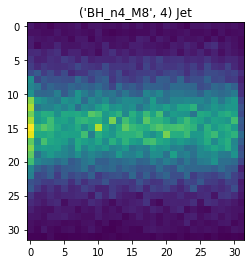

('BH_n4_M8', 6)
32


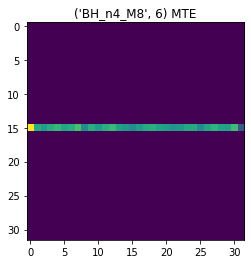

('BH_n5_M10', 0)
622


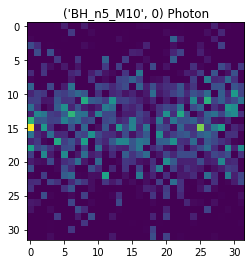

('BH_n5_M10', 1)
623


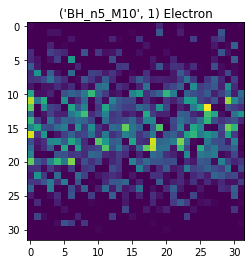

('BH_n5_M10', 2)
634


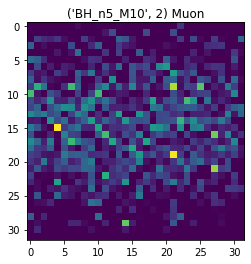

('BH_n5_M10', 3)
717


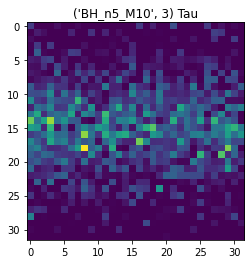

('BH_n5_M10', 4)
1023


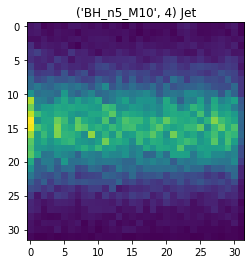

('BH_n5_M10', 6)
32


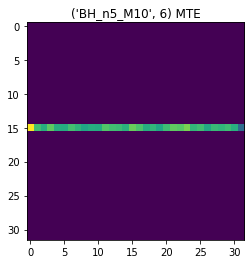

('BH_n5_M12', 0)
612


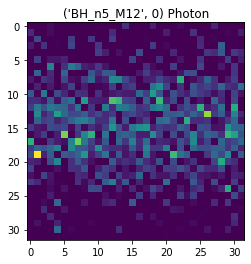

('BH_n5_M12', 1)
574


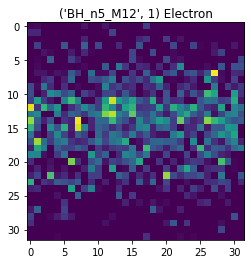

('BH_n5_M12', 2)
617


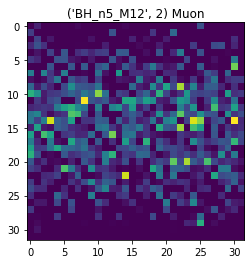

('BH_n5_M12', 3)
707


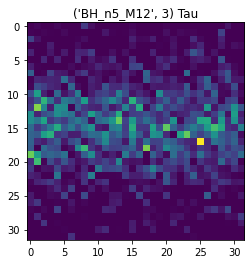

('BH_n5_M12', 4)
1022


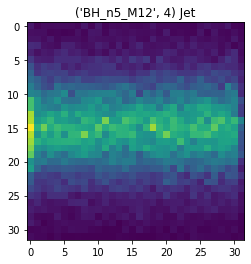

('BH_n5_M12', 6)
32


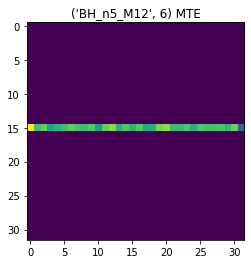

('BH_n6_M10', 0)
612


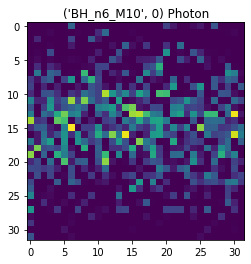

('BH_n6_M10', 1)
561


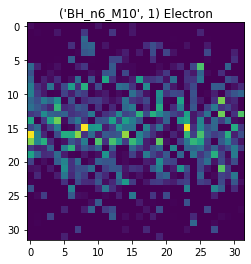

('BH_n6_M10', 2)
606


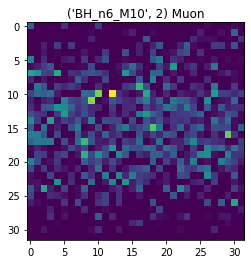

('BH_n6_M10', 3)
692


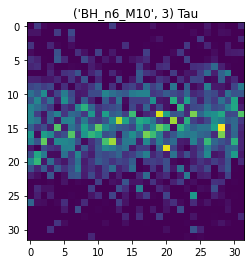

('BH_n6_M10', 4)
1024


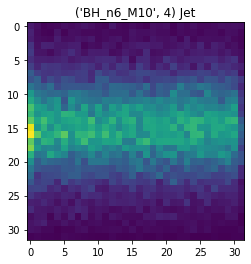

('BH_n6_M10', 6)
32


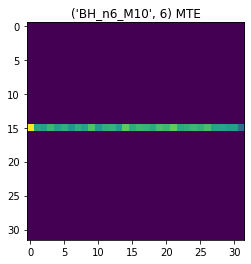

('BH_n6_M8', 0)
581


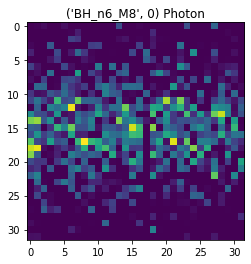

('BH_n6_M8', 1)
547


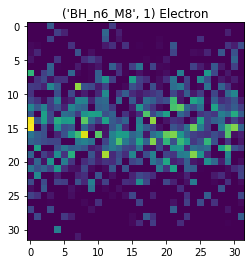

('BH_n6_M8', 2)
567


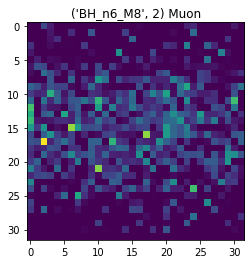

('BH_n6_M8', 3)
677


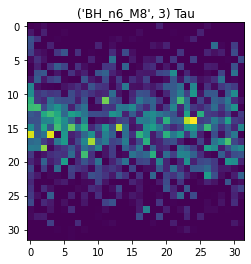

('BH_n6_M8', 4)
1023


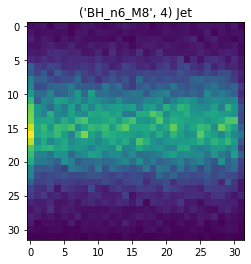

('BH_n6_M8', 6)
32


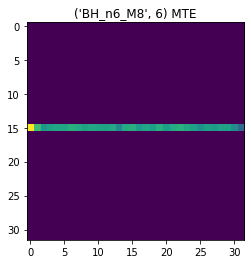

('PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL', 0)
675


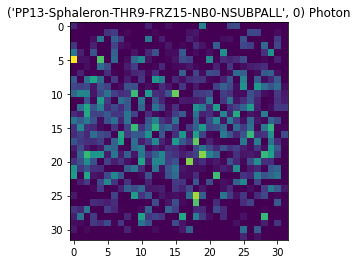

('PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL', 1)
816


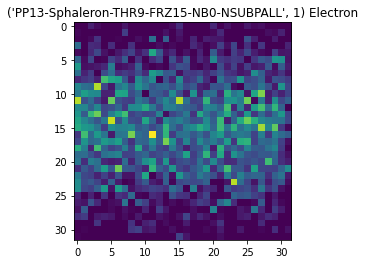

('PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL', 2)
881


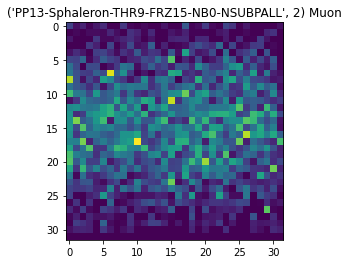

('PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL', 3)
866


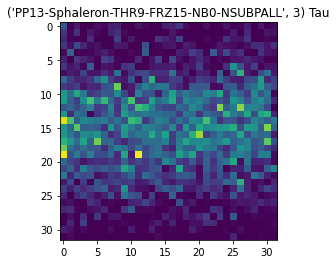

('PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL', 4)
1024


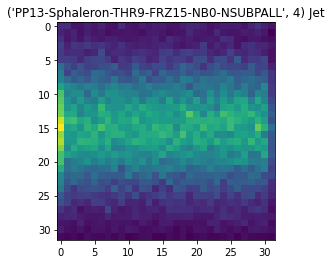

('PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL', 6)
32


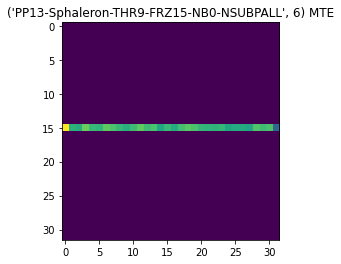

('ttbar', 0)
914


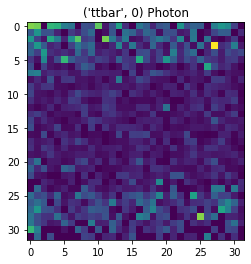

('ttbar', 1)
1019


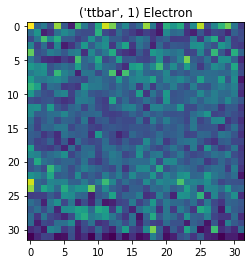

('ttbar', 2)
992


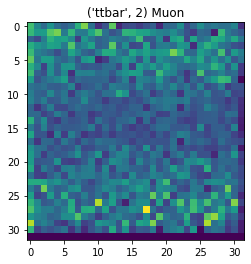

('ttbar', 3)
1021


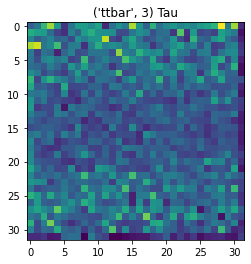

('ttbar', 4)
1024


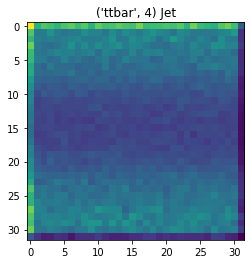

('ttbar', 6)
32


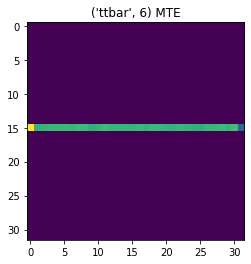

('ttbar_largejets', 0)
867


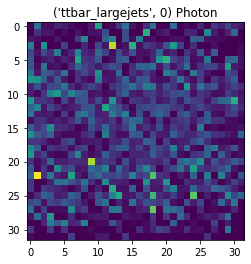

('ttbar_largejets', 1)
904


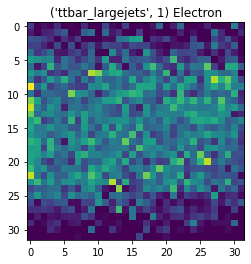

('ttbar_largejets', 2)
946


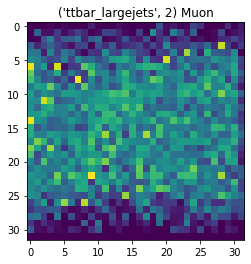

('ttbar_largejets', 3)
1003


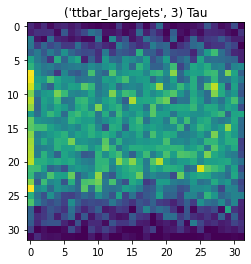

('ttbar_largejets', 4)
1024


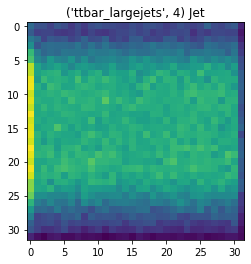

('ttbar_largejets', 6)
32


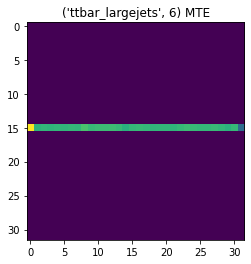

In [28]:
imageHeight = 32
imageWidth = 32
def createAllImages(imageHeight, imageWidth):
  images = {}
  eta2D = [getAllEtas(dataSet) for dataSet in dataSets]
  maxEta = 2.5 #*max(standardDeviance2D(eta2D))
  minEta = -2.5 #*max(standardDeviance2D(eta2D))
  maxPhi = 3.14
  minPhi = -3.14

  for dataSet in dataSets:
    (objTypeToMaxVal, binnedImages) = createEtaPhiBinnedImages(dataSet, imageHeight, imageWidth, maxEta, minEta, maxPhi, minPhi)
    normalizedImages = normalizeEnergyImages(objTypeToMaxVal, binnedImages)
    images.update(normalizedImages)
  return images

def mergeImagesByObjectTypeAndPlot(images, imageHeight, imageWidth):
  objectImages = {} # map fra (filename, objectType) til map fra (x, y) til energi
  for imageKey in images:
    filename, eventNr, objectType = imageKey
    image = images[imageKey]
    currentImageForObj = objectImages.get((filename, objectType), {})
    for coords in image:
      currentImageForObj[(coords)] = image[(coords)] + currentImageForObj.get((coords), 0)
    objectImages[(filename, objectType)] = currentImageForObj
  for imageKey in objectImages:
    filename, objectType = imageKey
    objectTypeHumanReadable = objectMapping[objectType]
    print(imageKey)
    print(len(objectImages[(imageKey)]))
    plt.title(f"{imageKey} {objectTypeHumanReadable}")
    filledInImage = fillBlanksInImage(objectImages[(imageKey)], imageHeight, imageWidth)
    #print(filledInImage)
    plt.imshow(filledInImage)
    startEndX = [0, imageWidth-1]
    startEndY = [imageHeight/2, imageWidth/2]
    #plt.plot(startEndX, startEndY)
    plt.show()
    #print(objectImages[(imageKey)])

images = createAllImages(imageHeight, imageWidth)
mergeImagesByObjectTypeAndPlot(images, imageHeight, imageWidth)







In [29]:
from itertools import chain
from pathlib import Path

def buildDataSet(outputPath):
  mergedImageForDataSet = {}
  for dataset in dataSets:
    mergedImages = []
    basePath = f'{outputPath}/{dataset.fileName}'
    Path(basePath).mkdir(parents=True, exist_ok=True)

    print(f'Path: {basePath}')

    for idx, data in enumerate(dataset.data):
      imageName = f'{basePath}/{idx}.png'
      if idx % 1000 == 0:
        print(f'at idx {idx}, file: {imageName}')
      electronImage= images.get((dataset.fileName, idx, objectMappingReverse["Electron"]), {})
      muonImage = images.get((dataset.fileName, idx, objectMappingReverse["Muon"]), {})
      jetsImage = images.get((dataset.fileName, idx, objectMappingReverse["Jet"]), {})
      mergedImage = mergeImageSparse(electronImage, muonImage, jetsImage)
      imageDims = (imageHeight, imageWidth)
      image = Image.new("RGB", imageDims)
      for coords in mergedImage:
        image.putpixel(coords, mergedImage[coords])
      image.save(imageName)

#buildDataSet("generatedData")

In [30]:
def getTensors(dataset):
  tensors = []
  for image in itertools.islice(mergedImageForDataSet[dataset.fileName], 0, 1000):
    indexes = []
    values = []
    for key in image:
      x, y = key
      indexes.append([x, y])
      value = image[key]
      values.append(list(value))
    if len(values) != 0:
      s = torch.sparse_coo_tensor(torch.tensor(indexes).t(), values, (imageHeight, imageWidth, 3)).to_dense()
      tensors.append([s, dataset.fileName])
  return tensors

In [31]:
def get_x(r_in):
  r = r_in[0].cpu().detach().numpy()
  return TensorImage([r[:,:,0],r[:,:,1],r[:,:,2]])
def get_y(r): return r[1]



In [32]:
def runFastAi():
  interpreters = {}
  for dataset in dataSets:
    if dataset.eventType == "blackHole":
      tensors = []
      tensors.extend(getTensors(dataset))
      for otherDataset in dataSets:
        if otherDataset.eventType == "sphaleron" or otherDataset.eventType == "tt_":
          tensors.extend(getTensors(otherDataset))
      dblock = DataBlock( blocks = (ImageBlock, CategoryBlock),
                      get_x = get_x, 
                      get_y = get_y,
                      splitter = RandomSplitter(valid_pct=0.5, seed=41),
                    )
      dls = dblock.dataloaders(tensors)
      dls.train.show_batch(max_n=3)
      dls.valid.show_batch(max_n=3)
      dls.cuda()
      learn = cnn_learner(dls, resnet18, metrics=error_rate).to_fp16()
      learn.lr_find()
      learn.fine_tune(1, base_lr=1e-3, wd=0.7)
      learn.recorder.plot_loss()
      interp = ClassificationInterpretation.from_learner(learn)
      #interp.plot_confusion_matrix(normalize=True)
      #interp.plot_top_losses(1, nrows=2)
      alltensors = []
      for otherSets in dataSets:
        alltensors.extend(getTensors(otherDataset))
      dls2 = dblock.dataloaders(alltensors)
      #print("loaders " + dls2.)
      learn.show_results(dl=dls2[1])
      #interp2 = ClassificationInterpretation.from_learner(learn, dl=dls2[1])
      #interp2.plot_confusion_matrix(normalize=True)
      #interp2.plot_top_losses(1, nrows=2)
      break
  
  print(interpreters)